# Maratona DEV - Challenge 3 | GFT
## Instruções: https://github.com/maratonadev/desafio-3-2021

## 1 - Importando as bibliotecas necessárias

In [1]:
!pip install mlxtend

In [1]:
from collections import OrderedDict
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

sns.set()

## 2 - Carregando os dados e exploração

### 2.1 - Carregando os dados

In [2]:
answers = pd.read_csv('datasets/answers.csv')
answers.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,...,T,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,...,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_seguro = pd.read_csv('datasets/InsuranceCompanyABC.csv')
df_seguro.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial
0,71504.0,42.993,4428.512,NE,1.0,T,T,T,T
1,59751.0,26.373,4489.930,CO,0.0,T,T,T,T
2,11877.0,46.977,4567.741,CO,0.0,F,F,F,F
3,33701.0,24.311,4592.132,NE,0.0,F,F,F,F
4,62029.0,28.896,4723.197,SE,1.0,F,F,F,F


In [4]:
df_investimento = pd.read_csv('datasets/InvestmentBankCDE.csv')
df_investimento.head()

,ID,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
0,71504.0,F,F,F,F,F,F,F
1,59751.0,F,F,F,F,F,F,F
2,11877.0,F,F,F,F,F,F,F
3,33701.0,T,T,T,T,T,T,T
4,62029.0,F,F,T,F,T,T,F


In [5]:
df_banco = pd.read_csv('datasets/RetailBankEFG.csv')
df_banco.head()

,ID,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,71504.0,T,T,T,T,T,F,F,T,F
1,59751.0,T,T,T,T,T,F,F,F,T
2,11877.0,F,F,F,F,F,F,F,F,F
3,33701.0,F,F,F,F,F,F,F,F,F
4,62029.0,F,T,T,T,T,T,T,T,T


In [6]:
confidence = 0.8
support = 0.1

### 2.2 - Exploração dos dados

In [7]:
print(f'O conjunto de dados do banco é formado por {df_banco.shape[0]} observações e {df_banco.shape[1]} atributos')
print(f'O conjunto de dados do investimento é formado por {df_investimento.shape[0]} observações e {df_investimento.shape[1]} atributos')
print(f'O conjunto de dados do seguro é formado por {df_seguro.shape[0]} observações e {df_seguro.shape[1]} atributos')

O conjunto de dados do banco é formado por 10082 observações e 10 atributos
O conjunto de dados do investimento é formado por 10082 observações e 8 atributos
O conjunto de dados do seguro é formado por 10082 observações e 9 atributos


In [8]:
# O conjuntos de dados possuem valores nulos?
print(f'O número de dados nulos no dataframe banco é: {df_banco.isna().sum().sum()}')
print(f'O número de dados nulos no dataframe investimento é: {df_investimento.isna().sum().sum()}')
print(f'O número de dados nulos no dataframe seguro é: {df_seguro.isna().sum().sum()}')

O número de dados nulos no dataframe banco é: 0
O número de dados nulos no dataframe investimento é: 0
O número de dados nulos no dataframe seguro é: 0


Todos os conjuntos de dados de treinamento não possuem dados nulos aparentes

In [9]:
# O conjunto de dados possuem valores duplicados?
print(f'O número de dados duplicados no dataframe banco é {df_banco.duplicated().sum()}')
print(f'O número de dados duplicados no dataframe investimento é {df_investimento.duplicated().sum()}')
print(f'O número de dados duplicados no dataframe seguro é {df_seguro.duplicated().sum()}')

O número de dados duplicados no dataframe banco é 115
O número de dados duplicados no dataframe investimento é 110
O número de dados duplicados no dataframe seguro é 77


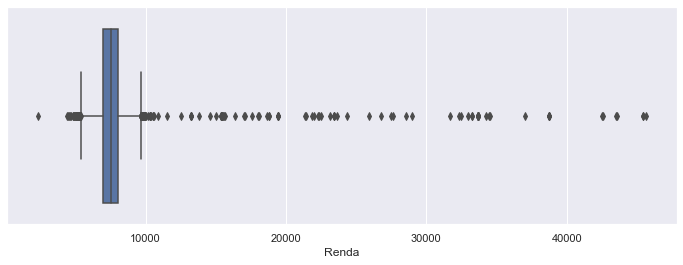

In [133]:
df['Renda'] = df['Renda'].astype('float')
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x='Renda', data=df.query('Renda < 50000'), ax=ax)
plt.show()

In [142]:
df['Renda'].quantile(0.1)

6494.134400000001

In [153]:
corte = df['Renda'].quantile(0.99)
print(corte)
df.query('Renda > @corte')

9740.029640000008


,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Financiamento Casa,...,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
186,44458,24.648,25890.000,NE,1,False,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False
232,20517,35.822,32456.000,SE,1,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
287,43870,43.438,45678.000,SE,0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
370,79971,35.855,43526.000,SE,1,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
470,41954,51.09,123222.000,SE,1,True,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12728,93046,40.087,10317.038,SE,0,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
12729,55486,31.589,10356.298,SE,1,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
12730,95085,18.783,10527.464,SE,0,False,False,False,False,False,...,True,True,True,False,False,True,True,True,False,False
12731,45040,19.48,10571.948,CO,1,False,False,False,False,True,...,True,True,False,True,True,True,True,True,True,True


### 2.3 - Limpando o dataframe e realizando o merge

Removendo as linhas duplicadas do dataframe

In [10]:
df_banco.drop_duplicates(inplace=True)
df_investimento.drop_duplicates(inplace=True)
df_seguro.drop_duplicates(inplace=True)

In [11]:
# Confirmando que todos os dados duplicados foram eliminados
print(f'O número de dados duplicados no dataframe banco é {df_banco.duplicated().sum()}')
print(f'O número de dados duplicados no dataframe investimento é {df_investimento.duplicated().sum()}')
print(f'O número de dados duplicados no dataframe seguro é {df_seguro.duplicated().sum()}')

O número de dados duplicados no dataframe banco é 0
O número de dados duplicados no dataframe investimento é 0
O número de dados duplicados no dataframe seguro é 0


In [12]:
df = df_seguro.merge(df_banco, on='ID', how='left')
df = df.merge(df_investimento, on='ID', how='left')
df.shape

(12733, 25)

In [13]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

ID: [71504. 59751. 11877. ... 95085. 45040. 85914.]
Idade: [42.993 26.373 46.977 ... 18.783 19.48  38.649]
Renda: [ 4428.512  4489.93   4567.741 ... 10527.464 10571.948 10881.77 ]
Regiao: ['NE' 'CO' 'SE' 'S' 'N']
Genero: [1. 0.]
seguro auto: ['T' 'F']
seguro vida Emp: ['T' 'F']
seguro vida PF: ['T' 'F']
Seguro Residencial: ['T' 'F']
Financiamento Casa: ['T' 'F']
Financiamento Carro: ['T' 'F']
Emprestimo _pessoal: ['T' 'F']
Emprestimo _consignado: ['T' 'F']
Emprestimo _limite_especial: ['T' 'F']
Emprestimo _educacao: ['F' 'T']
Emprestimo _viagem: ['F' 'T']
Investimento CDB: ['T' 'F']
Investimento Fundos: ['F' 'T']
Investimento Fundos_cambiais: ['F' 'T']
Investimento Fundos_commodities: ['F' 'T']
Investimento LCI: ['F' 'T']
Investimento LCA: ['F' 'T']
Investimento Poupanca: ['F' 'T']
Investimento Fundos Multimercado: ['F' 'T']
Investimento Tesouro Direto: ['F' 'T']


In [14]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(12733, 25)
(12733, 25)


In [15]:
df.reset_index().drop('index', axis=1)

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Financiamento Casa,...,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
0,71504.0,42.993,4428.512,NE,1.0,T,T,T,T,T,...,F,T,F,F,F,F,F,F,F,F
1,59751.0,26.373,4489.930,CO,0.0,T,T,T,T,T,...,F,F,T,F,F,F,F,F,F,F
2,11877.0,46.977,4567.741,CO,0.0,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
3,33701.0,24.311,4592.132,NE,0.0,F,F,F,F,F,...,F,F,F,T,T,T,T,T,T,T
4,62029.0,28.896,4723.197,SE,1.0,F,F,F,F,F,...,T,T,T,F,F,T,F,T,T,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12728,93046.0,40.087,10317.038,SE,0.0,F,F,F,T,F,...,F,F,F,F,T,F,F,T,F,F
12729,55486.0,31.589,10356.298,SE,1.0,F,F,F,F,F,...,F,T,F,F,T,F,F,F,F,F
12730,95085.0,18.783,10527.464,SE,0.0,F,F,F,F,F,...,T,T,T,F,F,T,T,T,F,F
12731,45040.0,19.480,10571.948,CO,1.0,F,F,F,F,T,...,T,T,F,T,T,T,T,T,T,T


In [16]:
colunas_servicos = ['seguro auto',
       'seguro vida Emp', 'seguro vida PF', 'Seguro Residencial',
       'Financiamento Casa', 'Financiamento Carro', 'Emprestimo _pessoal',
       'Emprestimo _consignado', 'Emprestimo _limite_especial',
       'Emprestimo _educacao', 'Emprestimo _viagem', 'Investimento CDB',
       'Investimento Fundos', 'Investimento Fundos_cambiais',
       'Investimento Fundos_commodities', 'Investimento LCI',
       'Investimento LCA', 'Investimento Poupanca',
       'Investimento Fundos Multimercado', 'Investimento Tesouro Direto']

In [17]:
for column in colunas_servicos:
    df[column] = df[column].map({'F': False, 'T': True})
    
df.head()

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Financiamento Casa,...,Emprestimo _viagem,Investimento CDB,Investimento Fundos,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
0,71504.0,42.993,4428.512,NE,1.0,True,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
1,59751.0,26.373,4489.930,CO,0.0,True,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False
2,11877.0,46.977,4567.741,CO,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,33701.0,24.311,4592.132,NE,0.0,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
4,62029.0,28.896,4723.197,SE,1.0,False,False,False,False,False,...,True,True,True,False,False,True,False,True,True,False


In [18]:
df = df.convert_dtypes()
df.dtypes

ID                                    Int64
Idade                               Float64
Renda                               Float64
Regiao                               string
Genero                                Int64
seguro auto                         boolean
seguro vida Emp                     boolean
seguro vida PF                      boolean
Seguro Residencial                  boolean
Financiamento Casa                  boolean
Financiamento Carro                 boolean
Emprestimo _pessoal                 boolean
Emprestimo _consignado              boolean
Emprestimo _limite_especial         boolean
Emprestimo _educacao                boolean
Emprestimo _viagem                  boolean
Investimento CDB                    boolean
Investimento Fundos                 boolean
Investimento Fundos_cambiais        boolean
Investimento Fundos_commodities     boolean
Investimento LCI                    boolean
Investimento LCA                    boolean
Investimento Poupanca           

In [19]:
answers.columns

Index(['ID', 'Idade', 'Renda', 'Regiao', 'Genero', 'seguro auto',
       'seguro vida Emp', 'seguro vida PF', 'Seguro Residencial',
       'Investimento Fundos_cambiais', 'Investimento Fundos_commodities',
       'Investimento LCI', 'Investimento LCA', 'Investimento Poupanca',
       'Investimento Fundos Multimercado', 'Investimento Tesouro Direto',
       'Financiamento Casa', 'Financiamento Carro', 'Emprestimo _pessoal',
       'Emprestimo _consignado', 'Emprestimo _limite_especial',
       'Emprestimo _educacao', 'Emprestimo _viagem', 'Investimento CDB',
       'Investimento Fundos', 'RECOMMENDATION_1', 'CONFIDENCE_1',
       'RECOMMENDATION_2', 'CONFIDENCE_2', 'RECOMMENDATION_3', 'CONFIDENCE_3'],
      dtype='object')

## 3 - Experimentando o primeiro modelo de associação

### 3.1 - Modelo apriori - Criando o conjunto de itens

In [56]:
df_test = df.drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero'], axis=1)

freq_conjuntos = apriori(df_test, min_support=support, use_colnames=True, max_len=5)
freq_conjuntos['length'] = freq_conjuntos['itemsets'].apply(lambda x: len(x))

### 3.2 - Modelo associate_rules - Criando as regras de associação

In [58]:
rules = association_rules(freq_conjuntos, metric="confidence", min_threshold=confidence).sort_values('confidence', ascending=False)
rules['length_antecedents'] = rules['antecedents'].apply(lambda x: len(x))
rules['length_consequents'] = rules['consequents'].apply(lambda x: len(x))

rules = rules.query('length_antecedents <= 5')
rules = rules.query('length_consequents == 1')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
48,"(seguro vida Emp, seguro vida PF, seguro auto)",(Seguro Residencial),0.198225,0.329223,0.197832,0.998019,3.031435,0.132572,338.608089,3,1
112,"(seguro vida Emp, seguro vida PF, Investimento...",(Seguro Residencial),0.100448,0.329223,0.100212,0.997654,3.030328,0.067142,285.974476,4,1
111,"(Seguro Residencial, seguro vida PF, Investime...",(seguro vida Emp),0.100762,0.341946,0.100212,0.994544,2.908482,0.065757,120.611875,4,1
47,"(Seguro Residencial, seguro vida PF, seguro auto)",(seguro vida Emp),0.199010,0.341946,0.197832,0.994081,2.907126,0.129782,111.167235,3,1
114,"(Seguro Residencial, seguro vida Emp, Investim...",(seguro vida PF),0.100919,0.247860,0.100212,0.992996,4.006280,0.075198,107.388893,4,1
...,...,...,...,...,...,...,...,...,...,...,...
58,"(seguro vida PF, Investimento CDB)","(seguro vida Emp, seguro auto)",0.124951,0.210084,0.100448,0.803897,3.826549,0.074197,4.028065,2,2
13,(seguro vida PF),"(Seguro Residencial, seguro auto)",0.247860,0.209691,0.199010,0.802915,3.829033,0.147036,4.009990,1,2
32,"(Investimento LCI, Investimento Fundos)",(Investimento CDB),0.158564,0.498390,0.127307,0.802873,1.610933,0.048280,2.544599,2,1
121,"(seguro vida PF, Investimento CDB)","(Seguro Residencial, seguro vida Emp, seguro a...",0.124951,0.199403,0.100212,0.802011,4.022060,0.075296,4.043650,2,3


In [60]:
answers_test = answers.drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero', 'RECOMMENDATION_1', 'CONFIDENCE_1',
                             'RECOMMENDATION_2', 'CONFIDENCE_2', 'RECOMMENDATION_3', 'CONFIDENCE_3'], 
                            axis=1)

for column in colunas_servicos:
    answers_test[column] = answers_test[column].map({'F': False, 'T': True})

answers_test

,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False
13726,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
13727,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
13728,True,True,True,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False


In [101]:
answers_test1 = answers_test[:1]
itemsets = apriori(answers_test1, use_colnames=True)['itemsets'].values
itemsets

array([frozenset({'Investimento Fundos_commodities'}),
       frozenset({'Investimento Fundos Multimercado'}),
       frozenset({'Emprestimo _educacao'}),
       frozenset({'Investimento CDB'}),
       frozenset({'Investimento Fundos_commodities', 'Investimento Fundos Multimercado'}),
       frozenset({'Investimento Fundos_commodities', 'Emprestimo _educacao'}),
       frozenset({'Investimento Fundos_commodities', 'Investimento CDB'}),
       frozenset({'Investimento Fundos Multimercado', 'Emprestimo _educacao'}),
       frozenset({'Investimento Fundos Multimercado', 'Investimento CDB'}),
       frozenset({'Emprestimo _educacao', 'Investimento CDB'}),
       frozenset({'Investimento Fundos_commodities', 'Investimento Fundos Multimercado', 'Emprestimo _educacao'}),
       frozenset({'Investimento Fundos_commodities', 'Investimento Fundos Multimercado', 'Investimento CDB'}),
       frozenset({'Investimento Fundos_commodities', 'Emprestimo _educacao', 'Investimento CDB'}),
       frozense

In [62]:
col_antecedentes = []
servicos_antecedentes = set()
for col in answers_test1.columns:
    if answers_test1[col].values:
        col_antecedentes.append(col)

col_antecedentes

['Investimento Fundos_commodities',
 'Investimento Fundos Multimercado',
 'Emprestimo _educacao',
 'Investimento CDB']

In [64]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
48,"(seguro vida Emp, seguro vida PF, seguro auto)",(Seguro Residencial),0.198225,0.329223,0.197832,0.998019,3.031435,0.132572,338.608089,3,1
112,"(seguro vida Emp, seguro vida PF, Investimento...",(Seguro Residencial),0.100448,0.329223,0.100212,0.997654,3.030328,0.067142,285.974476,4,1
111,"(Seguro Residencial, seguro vida PF, Investime...",(seguro vida Emp),0.100762,0.341946,0.100212,0.994544,2.908482,0.065757,120.611875,4,1
47,"(Seguro Residencial, seguro vida PF, seguro auto)",(seguro vida Emp),0.199010,0.341946,0.197832,0.994081,2.907126,0.129782,111.167235,3,1
114,"(Seguro Residencial, seguro vida Emp, Investim...",(seguro vida PF),0.100919,0.247860,0.100212,0.992996,4.006280,0.075198,107.388893,4,1


In [65]:
recommended_services = []
recommendations = {}

for item in itemsets:
    index_item_in_rules = rules.query('antecedents == @item').index.values.tolist()
    if index_item_in_rules:
        for i in index_item_in_rules:
            list_of_services = [service for service in rules.loc[i, 'consequents']]
            for service in list_of_services:
                if service not in recommendations:
                    recommendations[service] = rules.loc[i, 'confidence']
    recommendations_ordered = sorted(recommendations.items(),key=operator.itemgetter(1),reverse=True)

recommended_services.append(recommendations_ordered)
recommended_services

[[('Investimento Fundos', 0.8920353982300885),
  ('Emprestimo _viagem', 0.8737463126843658),
  ('Investimento CDB', 0.8296622613803231)]]

In [99]:
def suggest_services(df, rules=rules, answers=answers):
    for index in range(len(df)):
        itemsets = fpgrowth(df.iloc[[index]], use_colnames=True, max_len=5)['itemsets'].values
        ax = rules.query('@itemsets in antecedents').sort_values('confidence', ascending=False)
        ax.drop_duplicates(subset=['consequents'], keep='first', inplace=True)
        for i, row in ax.iterrows():
            if answers_test.loc[index, row['consequents']].values[0]:
                ax.drop(i, inplace=True) # drope services already used
        ax.reset_index(inplace=True, drop=True)
        ax_len = len(ax)
        
        if ax_len == 1:
            answers.loc[index, 'RECOMMENDATION_1'] = next(iter(ax.loc[0, 'consequents']))
            answers.loc[index, 'CONFIDENCE_1'] =  ax.loc[0, 'confidence']
        elif ax_len == 2:
            answers.loc[index, 'RECOMMENDATION_1'] = next(iter(ax.loc[0, 'consequents']))
            answers.loc[index, 'CONFIDENCE_1'] = ax.loc[0, 'confidence']
            answers.loc[index, 'RECOMMENDATION_2'] = next(iter(ax.loc[1, 'consequents']))
            answers.loc[index, 'CONFIDENCE_2'] = ax.loc[1, 'confidence']
        elif ax_len == 3: 
            answers.loc[index, 'RECOMMENDATION_1'] = next(iter(ax.loc[0, 'consequents']))
            answers.loc[index, 'CONFIDENCE_1'] = ax.loc[0, 'confidence']
            answers.loc[index, 'RECOMMENDATION_2'] = next(iter(ax.loc[1, 'consequents']))
            answers.loc[index, 'CONFIDENCE_2'] = ax.loc[1, 'confidence']
            answers.loc[index, 'RECOMMENDATION_3'] = next(iter(ax.loc[2, 'consequents']))
            answers.loc[index, 'CONFIDENCE_3'] = ax.loc[2, 'confidence']
          
    return answers
        

answers_df_1 = suggest_services(answers_test)
answers_df_1

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,...,T,F,T,F,Investimento Fundos,0.892035,Emprestimo _viagem,0.873746,NaN,NaN
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,...,F,F,T,F,Emprestimo _pessoal,0.985479,NaN,NaN,NaN,NaN
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,100932.0,28.659,8804.506,S,1.0,F,F,F,F,F,...,F,F,F,F,Investimento Fundos_cambiais,0.935602,Investimento LCA,0.843455,NaN,NaN
13726,100962.0,20.505,6809.895,SE,0.0,F,F,F,F,F,...,F,T,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13727,100963.0,21.067,6201.485,SE,1.0,F,F,F,F,F,...,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13728,100978.0,43.481,8130.084,N,0.0,T,T,T,T,F,...,T,F,T,F,Investimento Fundos,0.892035,Emprestimo _viagem,0.873746,NaN,NaN


###  3.3 - Final function to suggest services

In [103]:
def suggest_services_for_users(answers=answers, rules=rules):
    '''
    Function to suggest services for users
    
    input: dataframe to be answered, dataframe with rules
    
    output: dataframe
    '''
    answers_treated = answers.drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero', 'RECOMMENDATION_1', 'CONFIDENCE_1',
                             'RECOMMENDATION_2', 'CONFIDENCE_2', 'RECOMMENDATION_3', 'CONFIDENCE_3'], 
                            axis=1)

    for column in colunas_servicos:
        answers_treated[column] = answers_treated[column].map({'F': False, 'T': True})
    
    return suggest_services(answers_treated, rules=rules, answers=answers)
    


In [105]:
answers_ready = suggest_services_for_users(answers, rules)
answers_ready

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,...,T,F,T,F,Investimento Fundos,0.892035,Emprestimo _viagem,0.873746,NaN,NaN
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,...,F,F,T,F,Emprestimo _pessoal,0.985479,NaN,NaN,NaN,NaN
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,100932.0,28.659,8804.506,S,1.0,F,F,F,F,F,...,F,F,F,F,Investimento Fundos_cambiais,0.935602,Investimento LCA,0.843455,NaN,NaN
13726,100962.0,20.505,6809.895,SE,0.0,F,F,F,F,F,...,F,T,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13727,100963.0,21.067,6201.485,SE,1.0,F,F,F,F,F,...,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13728,100978.0,43.481,8130.084,N,0.0,T,T,T,T,F,...,T,F,T,F,Investimento Fundos,0.892035,Emprestimo _viagem,0.873746,NaN,NaN


## 4 - Saving the file 

In [108]:
answers_ready.to_csv('datasets/answers_ready.csv', index=False)

In [109]:
answers_ready_df = pd.read_csv('datasets/answers_ready.csv')
answers_ready_df.head(20)

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,...,T,F,T,F,Investimento Fundos,0.892035,Emprestimo _viagem,0.873746,NaN,NaN
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,...,F,F,T,F,Emprestimo _pessoal,0.985479,NaN,NaN,NaN,NaN
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
5,1048.0,56.736,6430.391,CO,1.0,F,T,F,F,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
6,1067.0,60.131,8517.631,CO,1.0,F,F,F,F,F,...,T,T,T,T,Investimento LCI,0.827256,Investimento Fundos_cambiais,0.823072,NaN,NaN
7,1068.0,43.942,8462.347,CO,1.0,F,F,F,F,T,...,T,T,T,T,Investimento Fundos_commodities,0.828520,Investimento LCI,0.819495,NaN,NaN
8,1085.0,43.369,8142.529,SE,1.0,F,T,F,T,F,...,F,F,F,T,seguro vida PF,0.900494,seguro auto,0.895907,NaN,NaN
9,1092.0,40.664,8082.479,CO,1.0,F,F,F,F,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN


*

## 5 - Experimentando se há diferença se criar regras por segmento de Idade, região e Renda

In [ ]:
df_test = df.drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero'], axis=1)

freq_conjuntos = apriori(df_test, min_support=support, use_colnames=True, max_len=5)
freq_conjuntos['length'] = freq_conjuntos['itemsets'].apply(lambda x: len(x))

In [ ]:
df_test = df.drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero'], axis=1)

freq_conjuntos = apriori(df_test, min_support=support, use_colnames=True, max_len=5)
freq_conjuntos['length'] = freq_conjuntos['itemsets'].apply(lambda x: len(x))

rules = association_rules(freq_conjuntos, metric="confidence", min_threshold=confidence).sort_values('confidence', ascending=False)
rules['length_antecedents'] = rules['antecedents'].apply(lambda x: len(x))
rules['length_consequents'] = rules['consequents'].apply(lambda x: len(x))

rules = rules.query('length_antecedents <= 5')
rules = rules.query('length_consequents == 1')
rules

In [115]:
df.value_counts('Regiao', normalize=True)

Regiao
SE    0.451190
NE    0.179062
CO    0.172936
S     0.147962
N     0.048849
dtype: float64

In [175]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
48,"(seguro vida Emp, seguro vida PF, seguro auto)",(Seguro Residencial),0.198225,0.329223,0.197832,0.998019,3.031435,0.132572,338.608089,3,1
112,"(seguro vida Emp, seguro vida PF, Investimento...",(Seguro Residencial),0.100448,0.329223,0.100212,0.997654,3.030328,0.067142,285.974476,4,1
111,"(Seguro Residencial, seguro vida PF, Investime...",(seguro vida Emp),0.100762,0.341946,0.100212,0.994544,2.908482,0.065757,120.611875,4,1
47,"(Seguro Residencial, seguro vida PF, seguro auto)",(seguro vida Emp),0.199010,0.341946,0.197832,0.994081,2.907126,0.129782,111.167235,3,1
114,"(Seguro Residencial, seguro vida Emp, Investim...",(seguro vida PF),0.100919,0.247860,0.100212,0.992996,4.006280,0.075198,107.388893,4,1


In [176]:
df_test_segmentacao = df.query('Renda > 10000').drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero'], axis=1)

freq_conjuntos_segmentacao = apriori(df_test_segmentacao, min_support=support, use_colnames=True, max_len=5)
freq_conjuntos_segmentacao['length'] = freq_conjuntos_segmentacao['itemsets'].apply(lambda x: len(x))

rules_segmentacao = association_rules(freq_conjuntos_segmentacao, metric="confidence", min_threshold=confidence).sort_values('confidence', ascending=False)
rules_segmentacao['length_antecedents'] = rules_segmentacao['antecedents'].apply(lambda x: len(x))
rules_segmentacao['length_consequents'] = rules_segmentacao['consequents'].apply(lambda x: len(x))

rules_segmentacao = rules_segmentacao.query('length_antecedents <= 5')
rules_segmentacao = rules_segmentacao.query('length_consequents == 1')
rules_segmentacao.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
84,"(Investimento Fundos_cambiais, Investimento Fu...",(Investimento LCI),0.101852,0.324074,0.101852,1.0,3.085714,0.068844,inf,3,1
71,"(Seguro Residencial, seguro vida PF, Investime...",(seguro vida Emp),0.111111,0.324074,0.111111,1.0,3.085714,0.075103,inf,3,1
29,"(Investimento Fundos_cambiais, Investimento Fu...",(Investimento LCI),0.166667,0.324074,0.166667,1.0,3.085714,0.112654,inf,2,1
65,"(Seguro Residencial, seguro vida PF, Investime...",(seguro auto),0.111111,0.287037,0.111111,1.0,3.483871,0.079218,inf,3,1
98,"(Seguro Residencial, seguro vida Emp, seguro v...",(seguro auto),0.111111,0.287037,0.111111,1.0,3.483871,0.079218,inf,4,1


In [180]:
rules_segmentacao.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
84,"(Investimento Fundos_cambiais, Investimento Fu...",(Investimento LCI),0.101852,0.324074,0.101852,1.0,3.085714,0.068844,inf,3,1
71,"(Seguro Residencial, seguro vida PF, Investime...",(seguro vida Emp),0.111111,0.324074,0.111111,1.0,3.085714,0.075103,inf,3,1
29,"(Investimento Fundos_cambiais, Investimento Fu...",(Investimento LCI),0.166667,0.324074,0.166667,1.0,3.085714,0.112654,inf,2,1
65,"(Seguro Residencial, seguro vida PF, Investime...",(seguro auto),0.111111,0.287037,0.111111,1.0,3.483871,0.079218,inf,3,1
98,"(Seguro Residencial, seguro vida Emp, seguro v...",(seguro auto),0.111111,0.287037,0.111111,1.0,3.483871,0.079218,inf,4,1


In [156]:
answers.Renda.describe()

count     13730.000000
mean       7817.596786
std        6821.191768
min        2312.000000
25%        6988.937000
50%        7533.079000
75%        8049.112000
max      580000.000000
Name: Renda, dtype: float64

In [158]:
df['Regiao'].value_counts()

SE    5745
NE    2280
CO    2202
S     1884
N      622
Name: Regiao, dtype: Int64

In [168]:
df['Idade'] = df['Idade'].astype('float')
df.query('Idade > 40').shape

(5335, 25)

In [162]:
df.dtypes

ID                                    Int64
Idade                               Float64
Renda                               float64
Regiao                               string
Genero                                Int64
seguro auto                         boolean
seguro vida Emp                     boolean
seguro vida PF                      boolean
Seguro Residencial                  boolean
Financiamento Casa                  boolean
Financiamento Carro                 boolean
Emprestimo _pessoal                 boolean
Emprestimo _consignado              boolean
Emprestimo _limite_especial         boolean
Emprestimo _educacao                boolean
Emprestimo _viagem                  boolean
Investimento CDB                    boolean
Investimento Fundos                 boolean
Investimento Fundos_cambiais        boolean
Investimento Fundos_commodities     boolean
Investimento LCI                    boolean
Investimento LCA                    boolean
Investimento Poupanca           

In [178]:
df_test_segmentacao = df.query('Idade < 40').drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero'], axis=1)

freq_conjuntos_segmentacao = apriori(df_test_segmentacao, min_support=support, use_colnames=True, max_len=5)
freq_conjuntos_segmentacao['length'] = freq_conjuntos_segmentacao['itemsets'].apply(lambda x: len(x))

rules_segmentacao_menor_40 = association_rules(freq_conjuntos_segmentacao, metric="confidence", min_threshold=confidence).sort_values('confidence', ascending=False)
rules_segmentacao_menor_40['length_antecedents'] = rules_segmentacao_menor_40['antecedents'].apply(lambda x: len(x))
rules_segmentacao_menor_40['length_consequents'] = rules_segmentacao_menor_40['consequents'].apply(lambda x: len(x))

rules_segmentacao_menor_40 = rules_segmentacao_menor_40.query('length_antecedents <= 5')
rules_segmentacao_menor_40 = rules_segmentacao_menor_40.query('length_consequents == 1')
rules_segmentacao_menor_40.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
115,"(seguro vida Emp, seguro vida PF, Investimento...",(Seguro Residencial),0.102744,0.328647,0.102609,0.998684,3.038777,0.068843,510.228471,4,1
50,"(seguro vida Emp, seguro vida PF, seguro auto)",(Seguro Residencial),0.200757,0.328647,0.200351,0.997980,3.036634,0.134373,332.319859,3,1
134,"(Investimento Fundos_cambiais, Investimento LC...",(Investimento Fundos_commodities),0.120995,0.339327,0.120319,0.994413,2.930548,0.079262,118.260511,4,1
114,"(Seguro Residencial, seguro vida PF, Investime...",(seguro vida Emp),0.103285,0.344329,0.102609,0.993455,2.885194,0.067045,100.186562,4,1
48,"(Seguro Residencial, seguro vida Emp, seguro a...",(seguro vida PF),0.201703,0.248344,0.200351,0.993298,3.999685,0.150260,112.147087,3,1


In [181]:
df_test_segmentacao = df.query('Idade >= 40').drop(['ID', 'Idade', 'Renda', 'Regiao', 'Genero'], axis=1)

freq_conjuntos_segmentacao = apriori(df_test_segmentacao, min_support=support, use_colnames=True, max_len=5)
freq_conjuntos_segmentacao['length'] = freq_conjuntos_segmentacao['itemsets'].apply(lambda x: len(x))

rules_segmentacao_maior_40 = association_rules(freq_conjuntos_segmentacao, metric="confidence", min_threshold=confidence).sort_values('confidence', ascending=False)
rules_segmentacao_maior_40['length_antecedents'] = rules_segmentacao_maior_40['antecedents'].apply(lambda x: len(x))
rules_segmentacao_maior_40['length_consequents'] = rules_segmentacao_maior_40['consequents'].apply(lambda x: len(x))

rules_segmentacao_maior_40 = rules_segmentacao_maior_40.query('length_antecedents <= 5')
rules_segmentacao_maior_40 = rules_segmentacao_maior_40.query('length_consequents == 1')
rules_segmentacao_maior_40.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_antecedents,length_consequents
42,"(seguro vida Emp, seguro vida PF, seguro auto)",(Seguro Residencial),0.194715,0.330022,0.194340,0.998075,3.024264,0.130080,348.053317,3,1
41,"(Seguro Residencial, seguro vida PF, seguro auto)",(seguro vida Emp),0.194903,0.338643,0.194340,0.997115,2.944443,0.128338,229.270365,3,1
40,"(Seguro Residencial, seguro vida Emp, seguro a...",(seguro vida PF),0.196214,0.247189,0.194340,0.990449,4.006850,0.145838,78.819322,3,1
11,"(seguro vida PF, seguro auto)",(Seguro Residencial),0.197151,0.330022,0.194903,0.988593,2.995533,0.129838,58.734695,2,1
39,"(Seguro Residencial, seguro vida Emp, seguro v...",(seguro auto),0.196589,0.276987,0.194340,0.988561,3.568984,0.139888,63.203430,3,1


O primeiro motivo por não fazer segmentação por idade, renda e região foi por falta de conhecimento do negocio, então é díficil saber se o modelo melhorou ou não

A segmentação por renda não foi satisfatória por causa da falta de dados e distribuição desigual

A segmentação por idade 